In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout, Conv2D, BatchNormalization, MaxPool2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import Sequential, save_model
import numpy as np

C:\Users\ampad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ampad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ampad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ampad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
train = ImageDataGenerator(rescale=1/255,vertical_flip=True,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale=1/255)

In [3]:
train_gen = train.flow_from_directory(r'D:\ML DATA\Projects\UPWORK\Deep learning image recognition\seg_train',target_size=(150, 150))
test_gen = test.flow_from_directory(r'D:\ML DATA\Projects\UPWORK\Deep learning image recognition\seg_test',target_size=(150, 150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [4]:
for image_batch, label_batch in train_gen:
    break
image_batch.shape, label_batch.shape

((32, 150, 150, 3), (32, 6))

In [5]:
val_image_batch, val_label_batch = next(iter(test_gen))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 150, 150, 3)


In [6]:
dataset_labels = sorted(train_gen.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Buildings' 'Forest' 'Glacier' 'Mountain' 'Sea' 'Street']


In [7]:
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(6,activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 75, 75, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 36, 36, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit_generator(train_gen,validation_data=test_gen, epochs=10)

Epoch 1/10
439/439 [==============================] - 233s 530ms/step - loss: 1.0237 - accuracy: 0.6097 - val_loss: 1.4690 - val_accuracy: 0.4813
Epoch 2/10
439/439 [==============================] - 88s 200ms/step - loss: 0.7418 - accuracy: 0.7185 - val_loss: 0.7439 - val_accuracy: 0.7253 accuracy: - ETA: 34s - loss: 0.7577 - accuracy - ETA: 33s - loss: 0.7 - ETA: 21s - loss:  - ETA: 16s - loss: 0.7500 - accuracy: 0.71 - ETA: 16s - loss: 0.7497 - accu - ETA: 13s - loss: 0.7478 - accuracy: 0.7 - ETA: 13s - loss: 0.7474 - accu - ETA: 11s - loss: 0.74 - ETA: 0s - loss: 0.7417 - accuracy: 0.71
Epoch 3/10
439/439 [==============================] - 93s 213ms/step - loss: 0.6478 - accuracy: 0.7565 - val_loss: 1.2812 - val_accuracy: 0.593048s - loss: 0. - ETA: 26s - loss: 0.6557 - accuracy - ETA: 24s - loss - ETA: 1s - loss: 0.6504 - accuracy:  - ETA: 0s - loss: 0.6492 - accuracy
Epoch 4/10
439/439 [==============================] - 97s 222ms/step - loss: 0.6010 - accuracy: 0.7771 - val_loss:

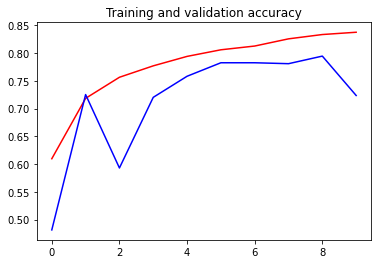

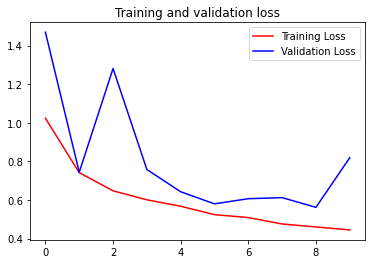

In [11]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 6)


In [13]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Glacier' 'Sea' 'Sea' 'Mountain' 'Buildings' 'Street' 'Mountain' 'Sea'
 'Forest' 'Street' 'Sea' 'Glacier' 'Forest' 'Sea' 'Mountain' 'Sea'
 'Forest' 'Mountain' 'Mountain' 'Buildings' 'Mountain' 'Buildings' 'Sea'
 'Street' 'Glacier' 'Street' 'Glacier' 'Sea' 'Mountain' 'Glacier' 'Forest'
 'Mountain']


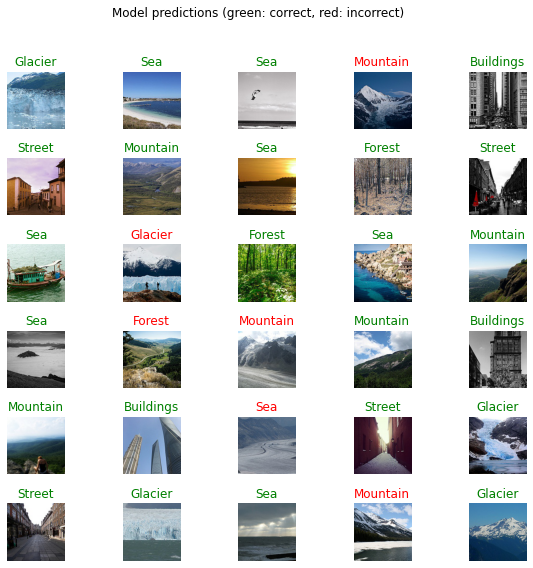

In [14]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [15]:
#save_model(model,r'D:\ML DATA\Projects\UPWORK\Deep learning image recognition')

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16

In [17]:
vgg16 = VGG16(include_top=False,weights=None, input_shape=(150,150,3))

In [18]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [19]:
for layer in vgg16.layers:
    layer.trainable = False

In [20]:
last_layer =vgg16.get_layer('block5_conv3')

In [21]:
last_output = last_layer.output

In [22]:
x = Flatten()(last_output)
x = Dense(128,activation="relu")(x)
x = Dense(6,activation="softmax")(x)
model = Model(vgg16.input,x)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit_generator(train_gen,validation_data=test_gen, epochs=100)

Epoch 1/100
439/439 [==============================] - 221s 504ms/step - loss: 1.7250 - accuracy: 0.2897 - val_loss: 1.6058 - val_accuracy: 0.3720
Epoch 2/100
439/439 [==============================] - 213s 484ms/step - loss: 1.5058 - accuracy: 0.4275 - val_loss: 1.4055 - val_accuracy: 0.4650
Epoch 3/100
439/439 [==============================] - 238s 541ms/step - loss: 1.3610 - accuracy: 0.4830 - val_loss: 1.3127 - val_accuracy: 0.4810
Epoch 4/100
439/439 [==============================] - 227s 517ms/step - loss: 1.2843 - accuracy: 0.5022 - val_loss: 1.2632 - val_accuracy: 0.4990
Epoch 5/100
439/439 [==============================] - 233s 530ms/step - loss: 1.2329 - accuracy: 0.5212 - val_loss: 1.2446 - val_accuracy: 0.5063
Epoch 6/100
439/439 [==============================] - 223s 509ms/step - loss: 1.1999 - accuracy: 0.5311 - val_loss: 1.2027 - val_accuracy: 0.5190
Epoch 7/100
439/439 [==============================] - 251s 572ms/step - loss: 1.1714 - accuracy: 0.5419 - val_loss: 1

439/439 [==============================] - 213s 484ms/step - loss: 0.8368 - accuracy: 0.6915 - val_loss: 0.9437 - val_accuracy: 0.6603
Epoch 57/100
439/439 [==============================] - 217s 495ms/step - loss: 0.8312 - accuracy: 0.6967 - val_loss: 0.9004 - val_accuracy: 0.6767
Epoch 58/100
439/439 [==============================] - 212s 484ms/step - loss: 0.8377 - accuracy: 0.6919 - val_loss: 0.9183 - val_accuracy: 0.6650
Epoch 59/100
439/439 [==============================] - 217s 495ms/step - loss: 0.8283 - accuracy: 0.6918 - val_loss: 0.9863 - val_accuracy: 0.6417
Epoch 60/100
439/439 [==============================] - 213s 485ms/step - loss: 0.8306 - accuracy: 0.6939 - val_loss: 0.9188 - val_accuracy: 0.6693
Epoch 61/100
439/439 [==============================] - 213s 485ms/step - loss: 0.8239 - accuracy: 0.6979 - val_loss: 0.9159 - val_accuracy: 0.6707
Epoch 62/100
439/439 [==============================] - 222s 505ms/step - loss: 0.8278 - accuracy: 0.6963 - val_loss: 0.9215 

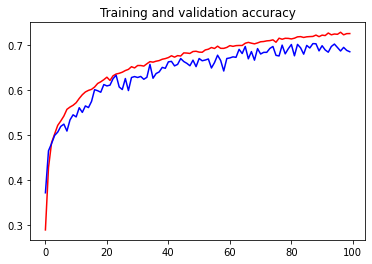

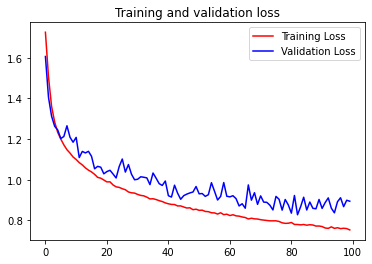

In [26]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
final_loss, final_accuracy = model.evaluate(test_gen)
print('Final loss: {:.2f}'.format(final_loss))
print('Final accuracy: {:.2f}%'.format(final_accuracy * 100))

94/94 [==============================] - 37s 390ms/step - loss: 0.8940 - accuracy: 0.6843
Final loss: 0.89
Final accuracy: 68.43%


In [28]:
for image_batch, label_batch in train_gen:
    break
image_batch.shape, label_batch.shape

((32, 150, 150, 3), (32, 6))

In [29]:
val_image_batch, val_label_batch = next(iter(test_gen))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 150, 150, 3)


In [30]:
dataset_labels = sorted(train_gen.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Buildings' 'Forest' 'Glacier' 'Mountain' 'Sea' 'Street']


In [31]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 6)


In [32]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Buildings' 'Glacier' 'Mountain' 'Buildings' 'Buildings' 'Street'
 'Buildings' 'Buildings' 'Glacier' 'Glacier' 'Buildings' 'Street' 'Street'
 'Mountain' 'Glacier' 'Sea' 'Forest' 'Forest' 'Sea' 'Mountain' 'Buildings'
 'Forest' 'Glacier' 'Buildings' 'Mountain' 'Street' 'Street' 'Glacier'
 'Buildings' 'Glacier' 'Glacier' 'Forest']


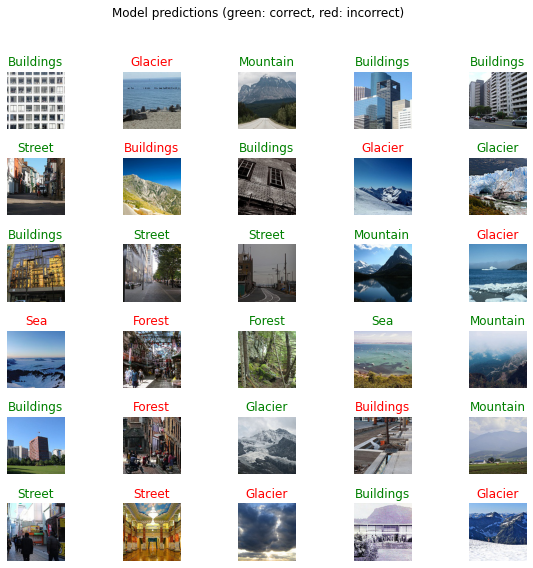

In [34]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")